In [ ]:
# Fungsi keanggotaan fuzzy
def fuzzify_kecepatan(value):
    lambat = max(0, min(1, (5 - value) / 5))
    sedang = max(0, min((value / 5), (10 - value) / 5))
    cepat = max(0, min(1, (value - 5) / 5))
    return lambat, sedang, cepat

def fuzzify_kualitas(value):
    buruk = max(0, min(1, (5 - value) / 5))
    sedang = max(0, min((value / 5), (10 - value) / 5))
    bagus = max(0, min(1, (value - 5) / 5))
    return buruk, sedang, bagus

def fuzzify_suasana(value):
    tidak_nyaman = max(0, min(1, (5 - value) / 5))
    cukup = max(0, min((value / 5), (10 - value) / 5))
    nyaman = max(0, min(1, (value - 5) / 5))
    return tidak_nyaman, cukup, nyaman

In [4]:
# Fungsi keanggotaan fuzzy
def fuzzify_kecepatan(value):
    lambat = max(0, min(1, (5 - value) / 5))
    sedang = max(0, min((value / 5), (10 - value) / 5))
    cepat = max(0, min(1, (value - 5) / 5))
    return lambat, sedang, cepat

def fuzzify_kualitas(value):
    buruk = max(0, min(1, (5 - value) / 5))
    sedang = max(0, min((value / 5), (10 - value) / 5))
    bagus = max(0, min(1, (value - 5) / 5))
    return buruk, sedang, bagus

def fuzzify_suasana(value):
    tidak_nyaman = max(0, min(1, (5 - value) / 5))
    cukup = max(0, min((value / 5), (10 - value) / 5))
    nyaman = max(0, min(1, (value - 5) / 5))
    return tidak_nyaman, cukup, nyaman

# Rule base
def inferensi(kecepatan_fuzz, kualitas_fuzz, suasana_fuzz):
    lambat, sedang, cepat = kecepatan_fuzz
    buruk, sedang_kualitas, bagus = kualitas_fuzz
    tidak_nyaman, cukup, nyaman = suasana_fuzz

    # Aturan fuzzy
    tidak_puas = max(
        min(lambat, buruk, tidak_nyaman),
        min(lambat, buruk, cukup),
        min(sedang, buruk, tidak_nyaman),
    )

    puas = max(
        min(sedang, sedang_kualitas, cukup),
        min(cepat, sedang_kualitas, cukup),
    )

    sangat_puas = min(cepat, bagus, nyaman)  # Tidak perlu max() di sini

    return tidak_puas, puas, sangat_puas

# Defuzzifikasi (metode Centroid)
def defuzzifikasi(tidak_puas, puas, sangat_puas):
    # Domain output (0 - 10), tanpa NumPy
    domain = [x * 0.1 for x in range(101)]  # Menggunakan list comprehension untuk membuat domain dari 0 sampai 10

    # Fungsi keanggotaan output
    def tidak_puas_mf(x):
        return max(0, min(1, (5 - x) / 5))

    def puas_mf(x):
        return max(0, min((x / 5), (10 - x) / 5))

    def sangat_puas_mf(x):
        return max(0, min(1, (x - 5) / 5))

    # Hitung kombinasi keanggotaan
    aggregated = [
        max(
            tidak_puas * tidak_puas_mf(x),
            puas * puas_mf(x),
            sangat_puas * sangat_puas_mf(x),
        )
        for x in domain
    ]

    # Defuzzifikasi (centroid)
    numerator = sum(x * aggregated[i] for i, x in enumerate(domain))
    denominator = sum(aggregated)
    return numerator / denominator if denominator != 0 else 0


In [5]:
# Input nilai
kecepatan = 7  # Nilai kecepatan pelayanan (0-10)
kualitas = 8   # Nilai kualitas makanan (0-10)
suasana = 6    # Nilai suasana restoran (0-10)

# Proses fuzzy
kecepatan_fuzz = fuzzify_kecepatan(kecepatan)
kualitas_fuzz = fuzzify_kualitas(kualitas)
suasana_fuzz = fuzzify_suasana(suasana)

# Inferensi
tidak_puas, puas, sangat_puas = inferensi(kecepatan_fuzz, kualitas_fuzz, suasana_fuzz)

# Defuzzifikasi
hasil = defuzzifikasi(tidak_puas, puas, sangat_puas)


print(f"Tingkat kebahagiaan pelanggan: {hasil:.2f}")

Tingkat kebahagiaan pelanggan: 5.36


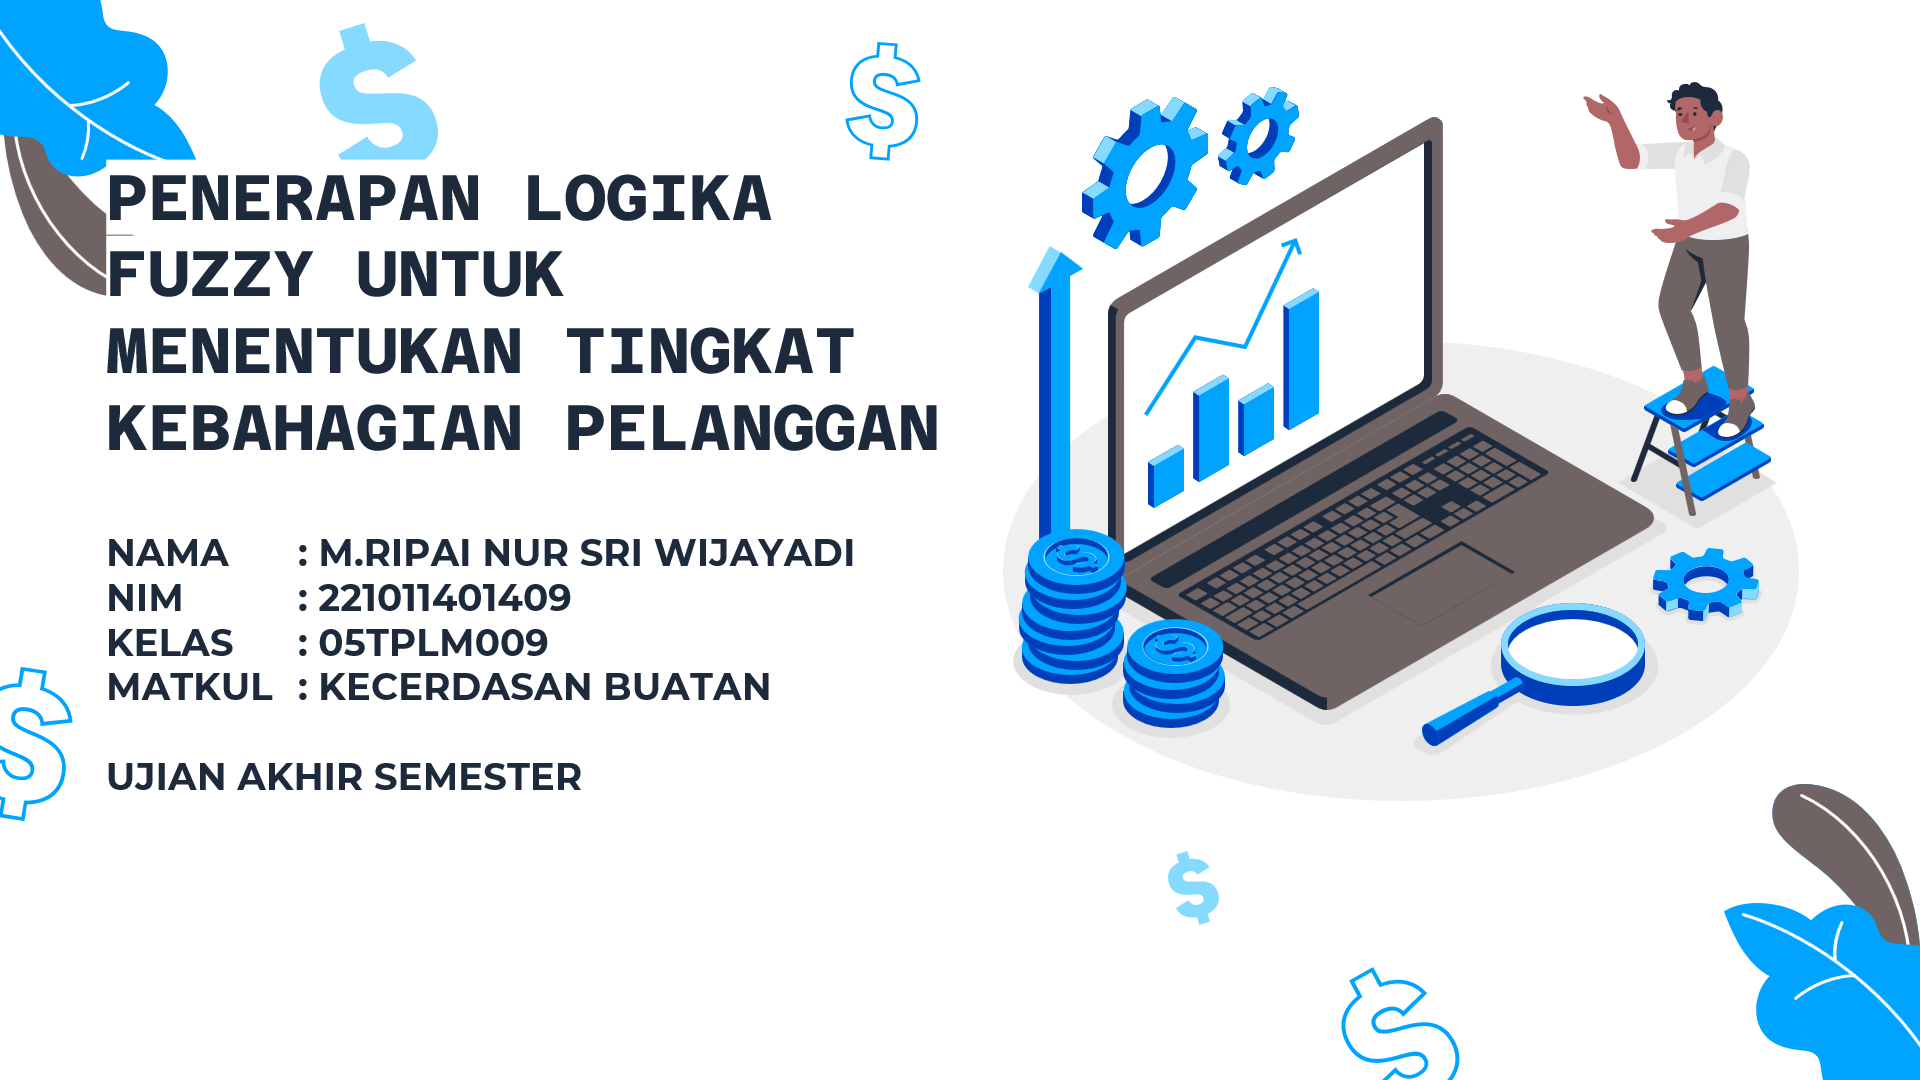

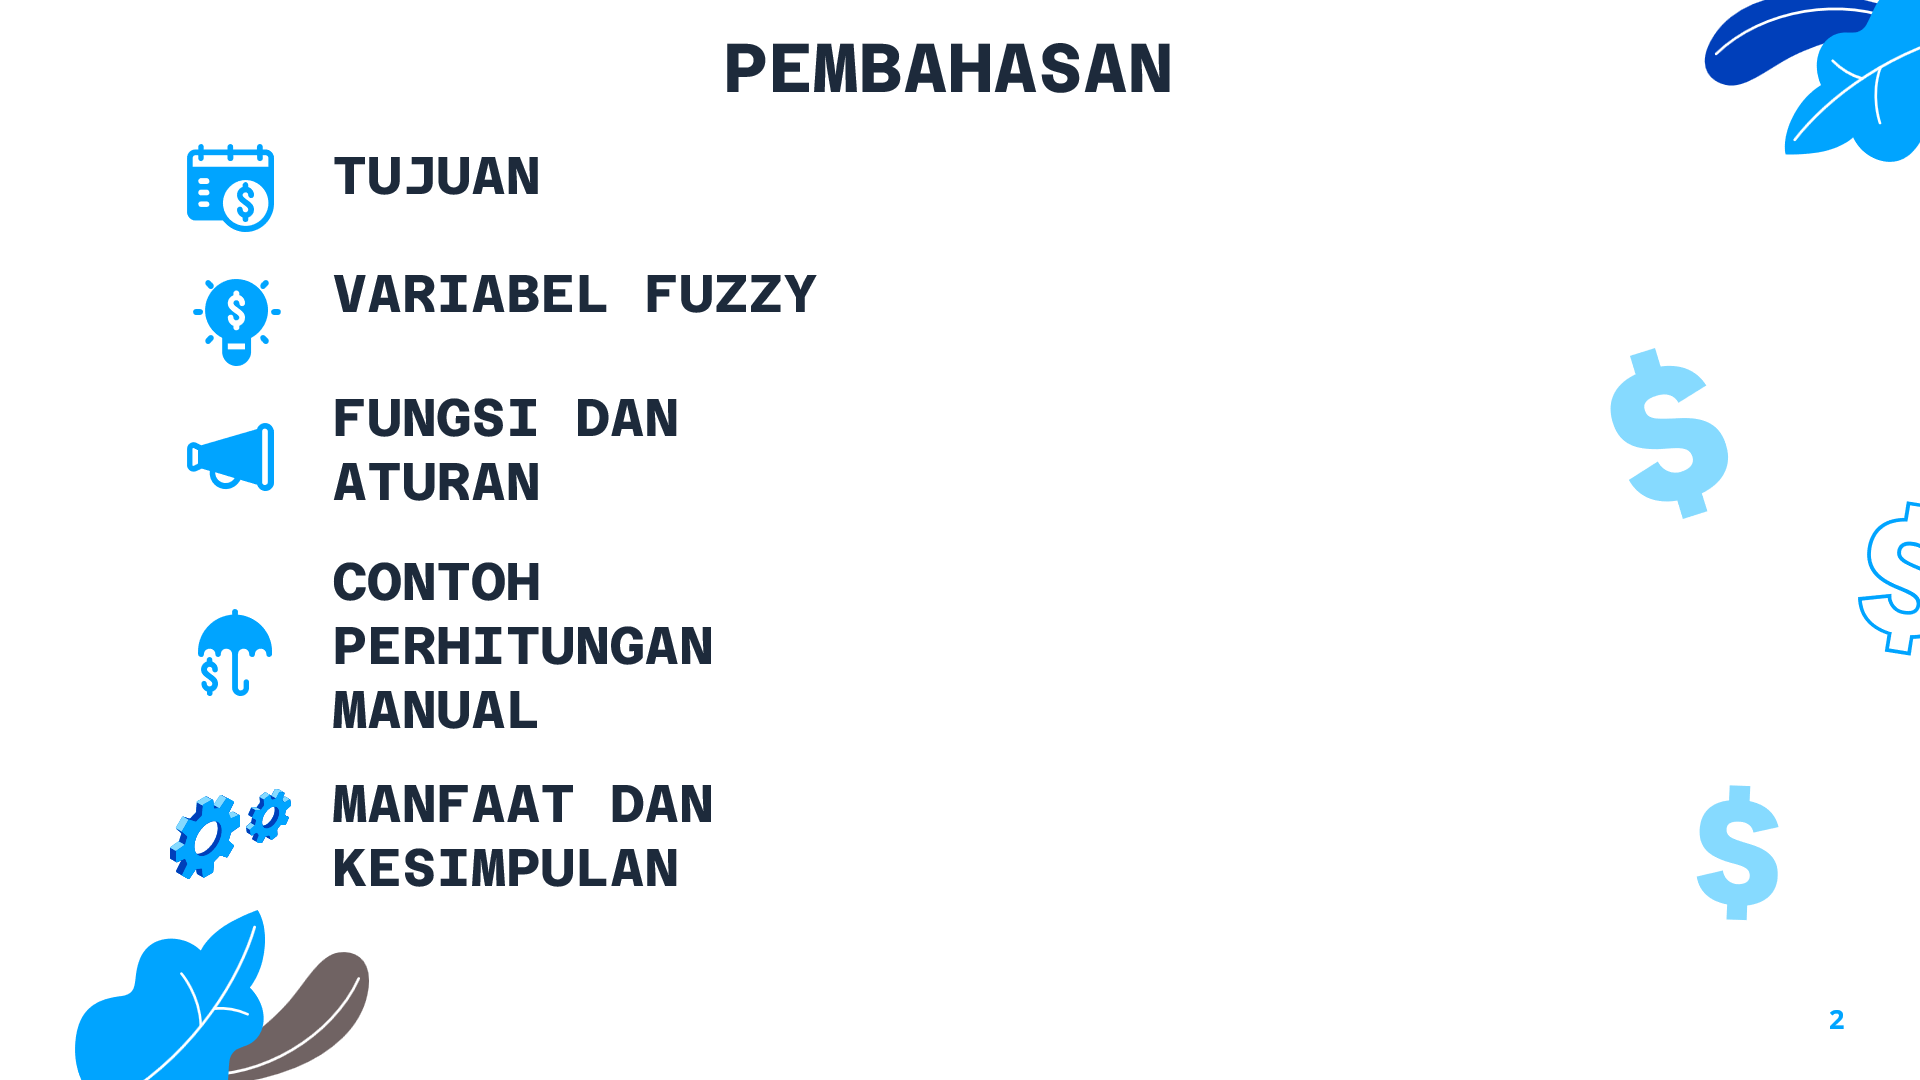

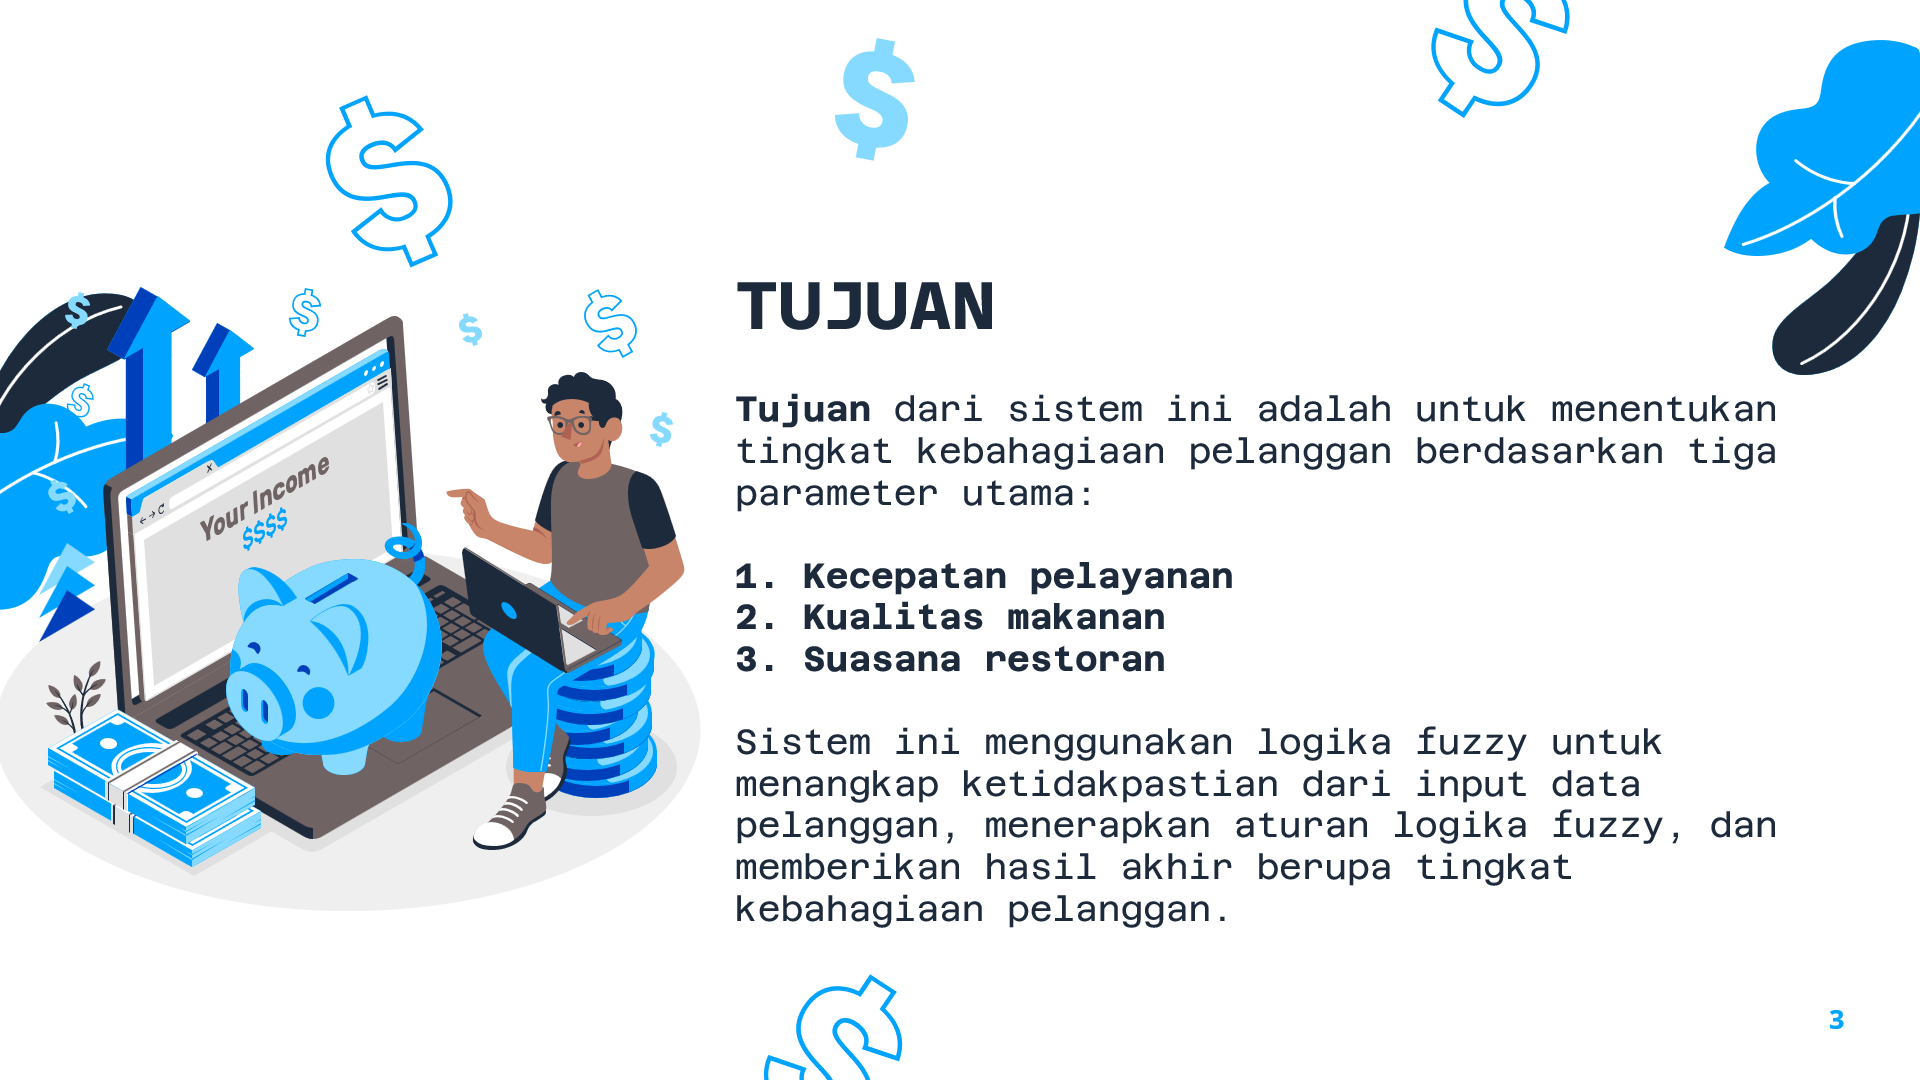

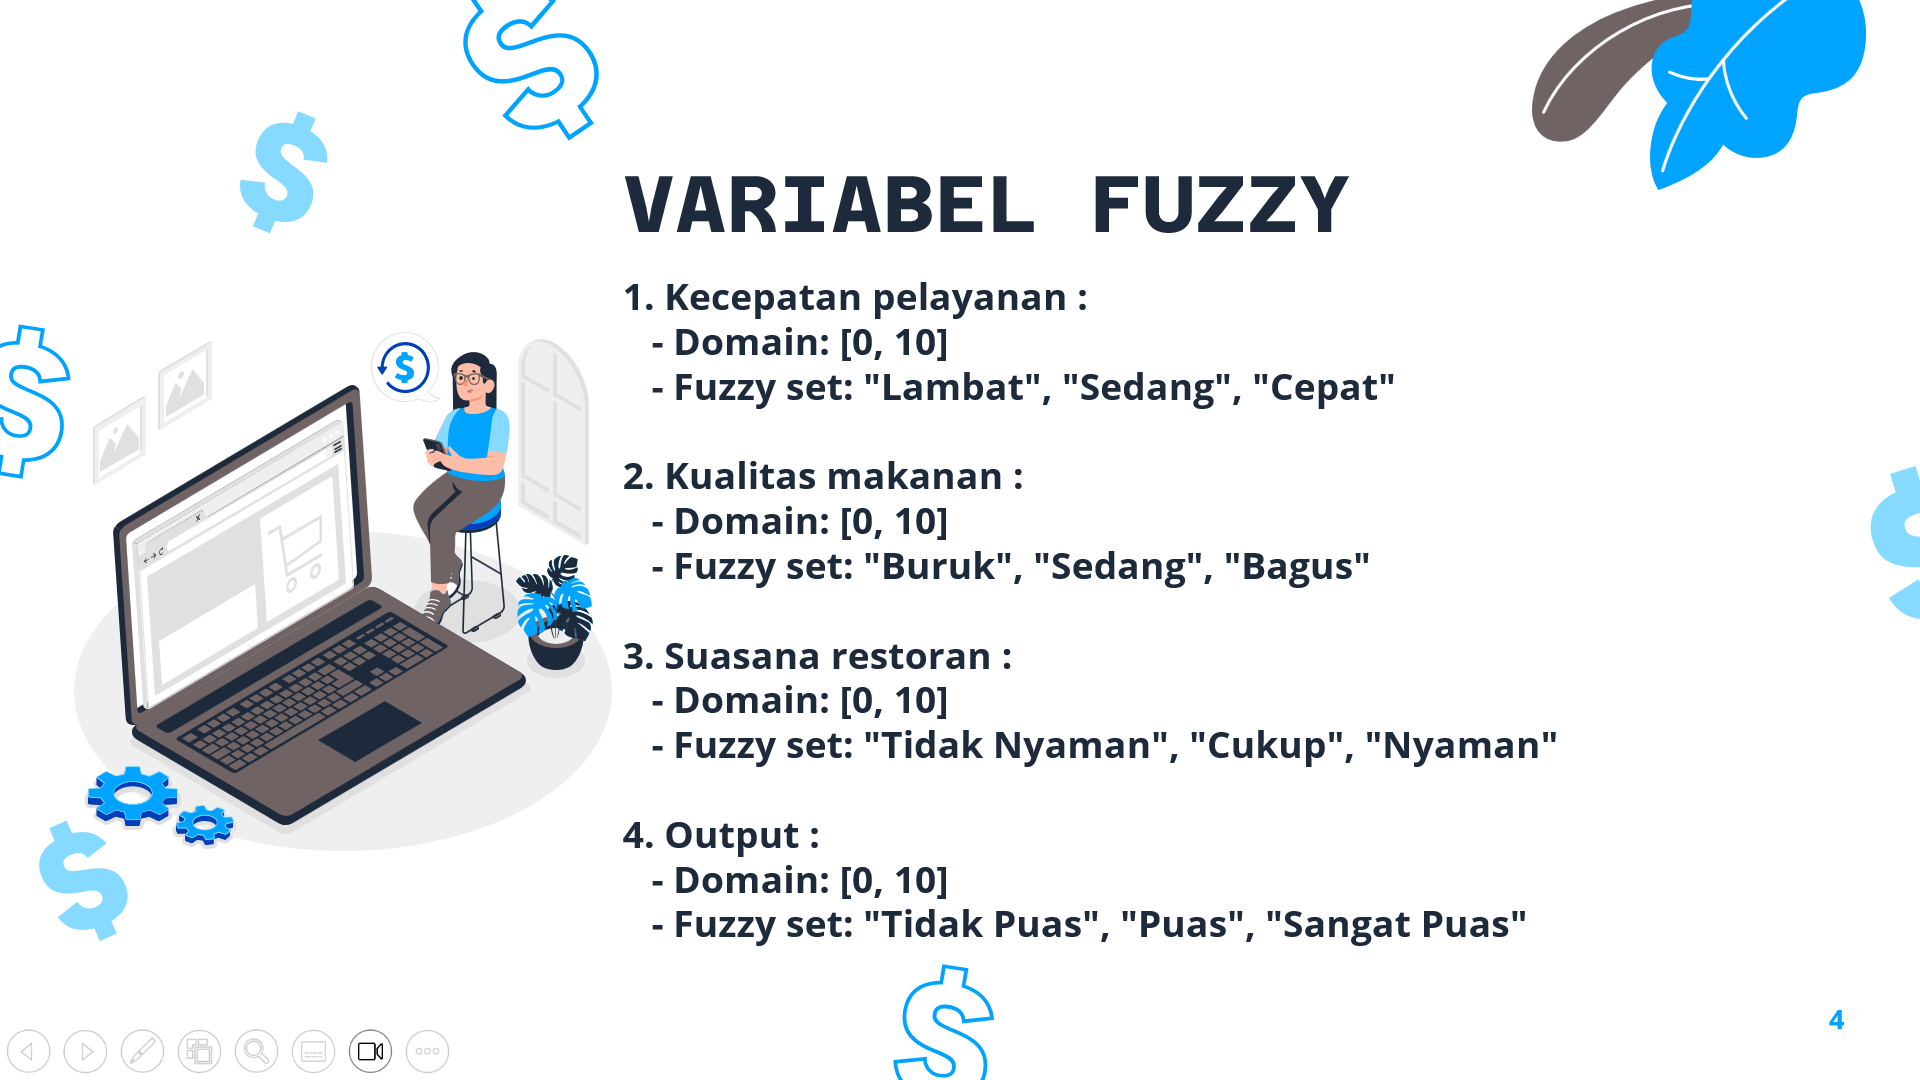

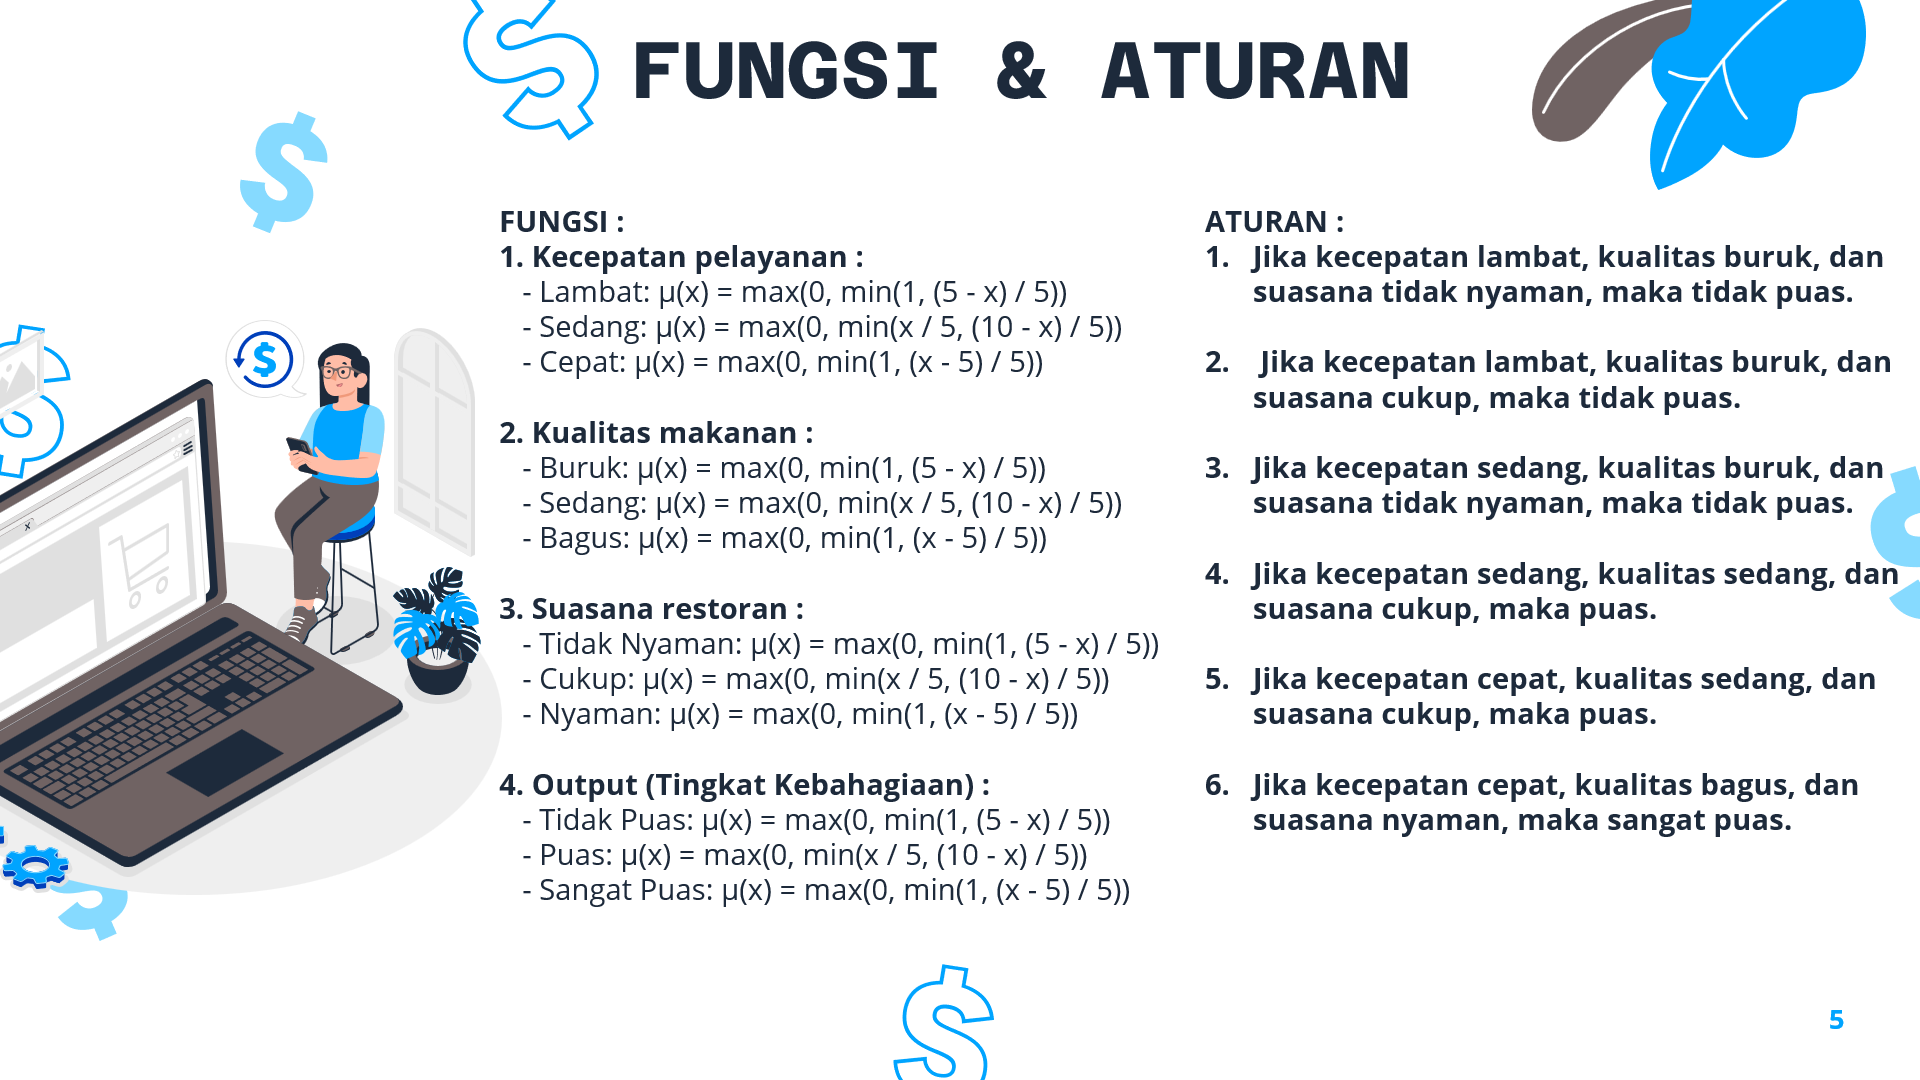

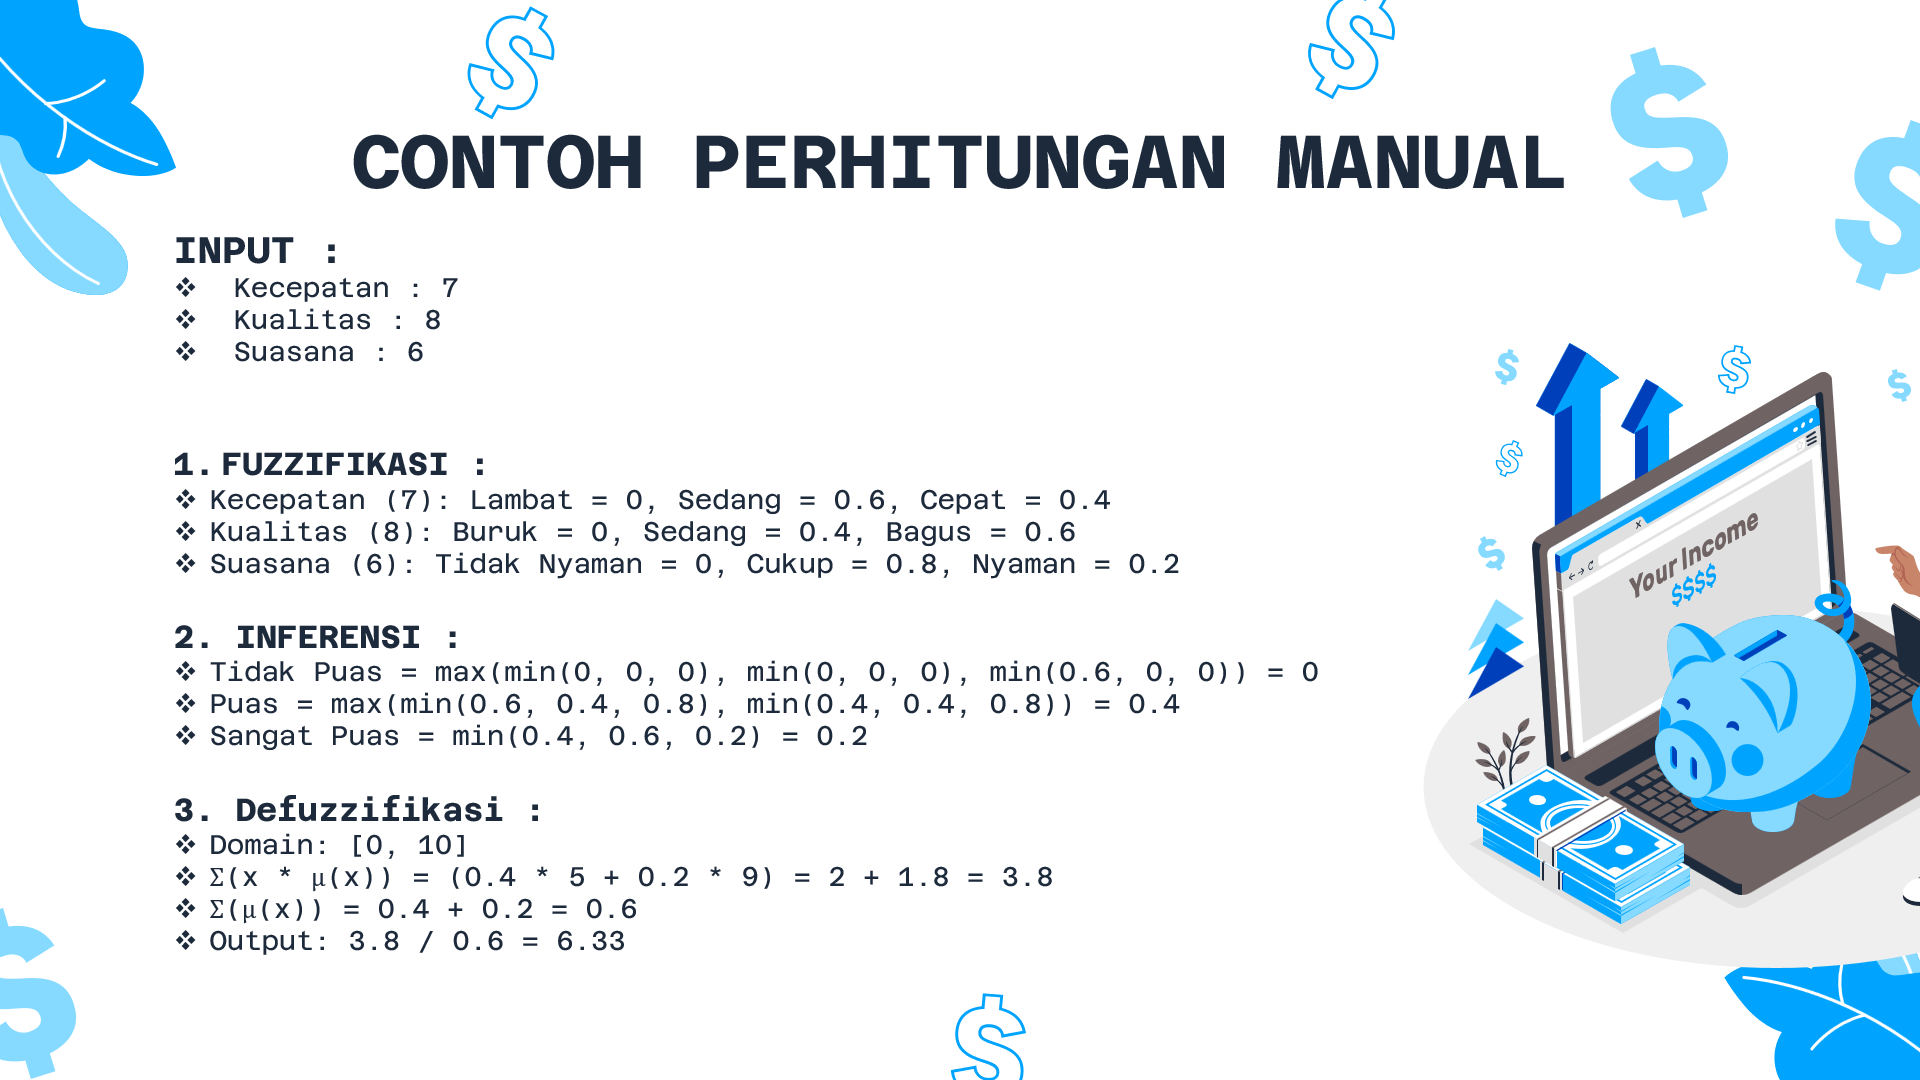

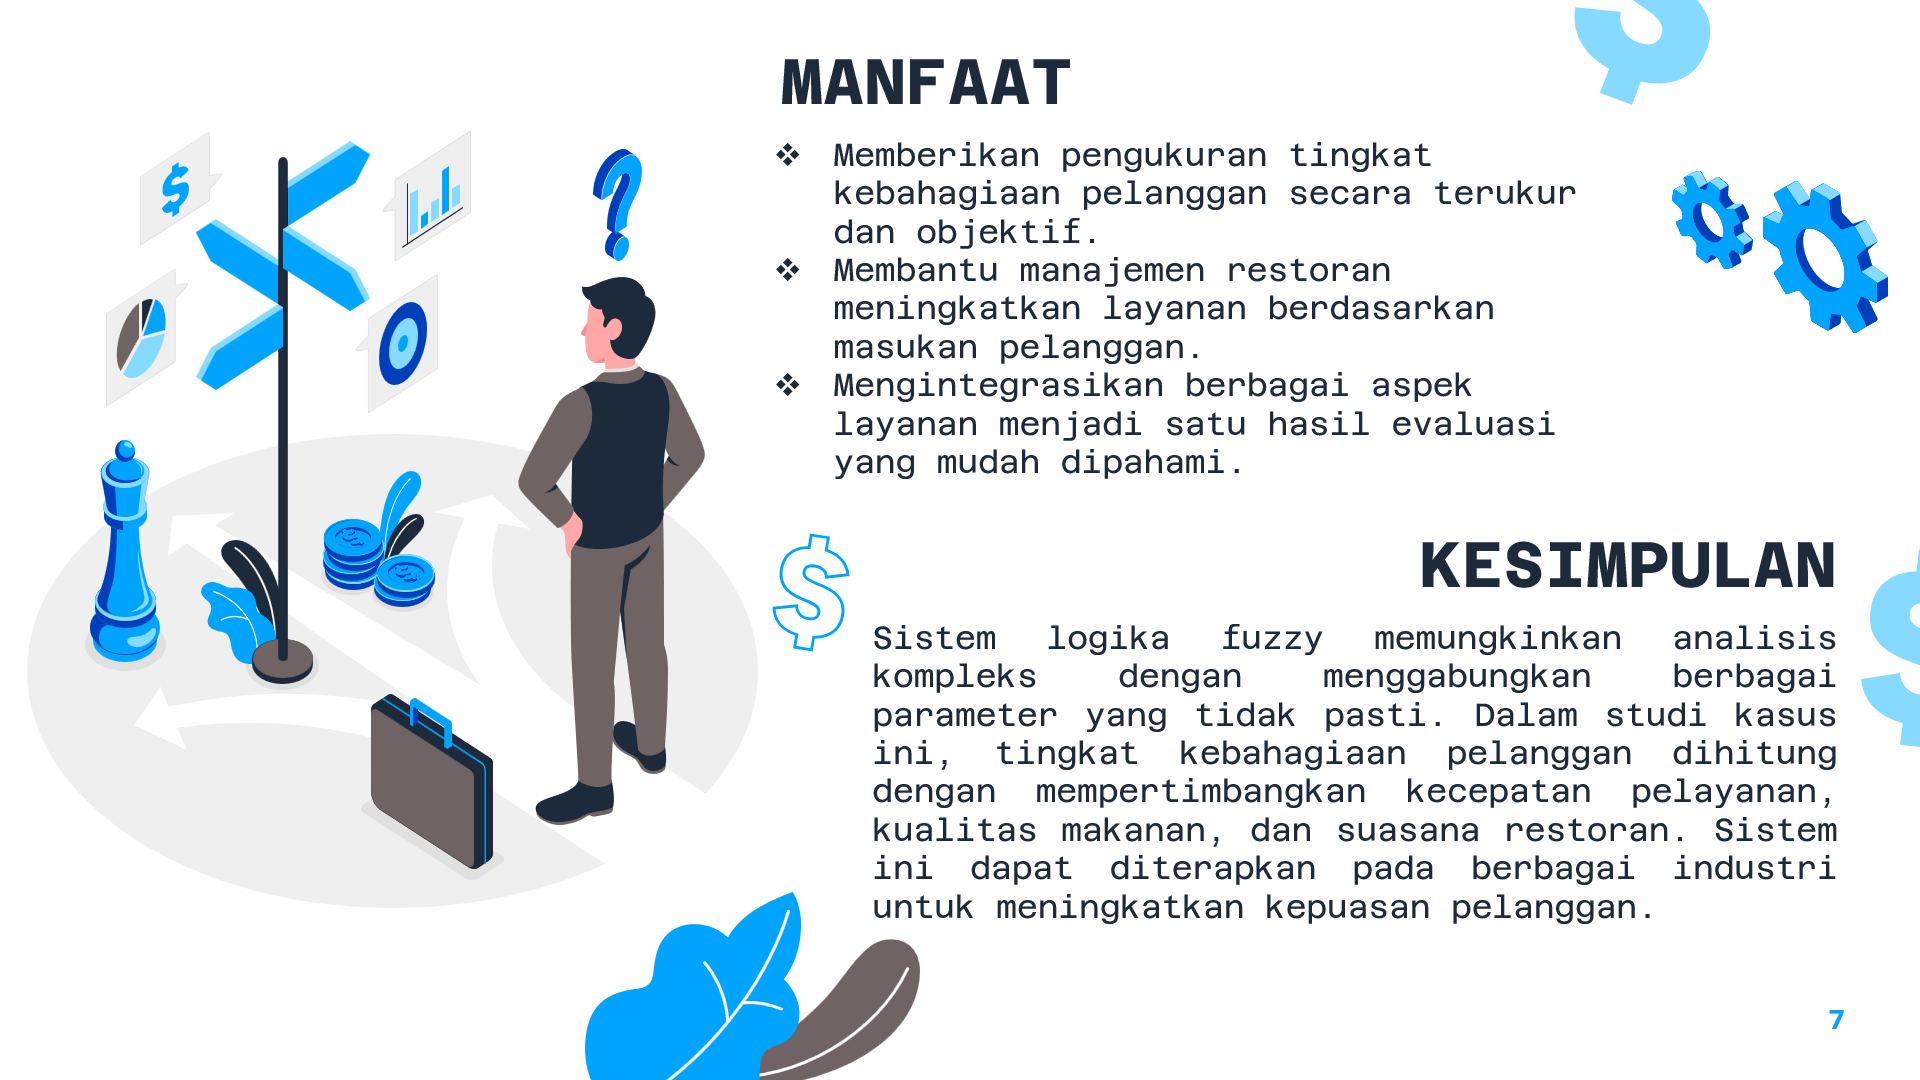

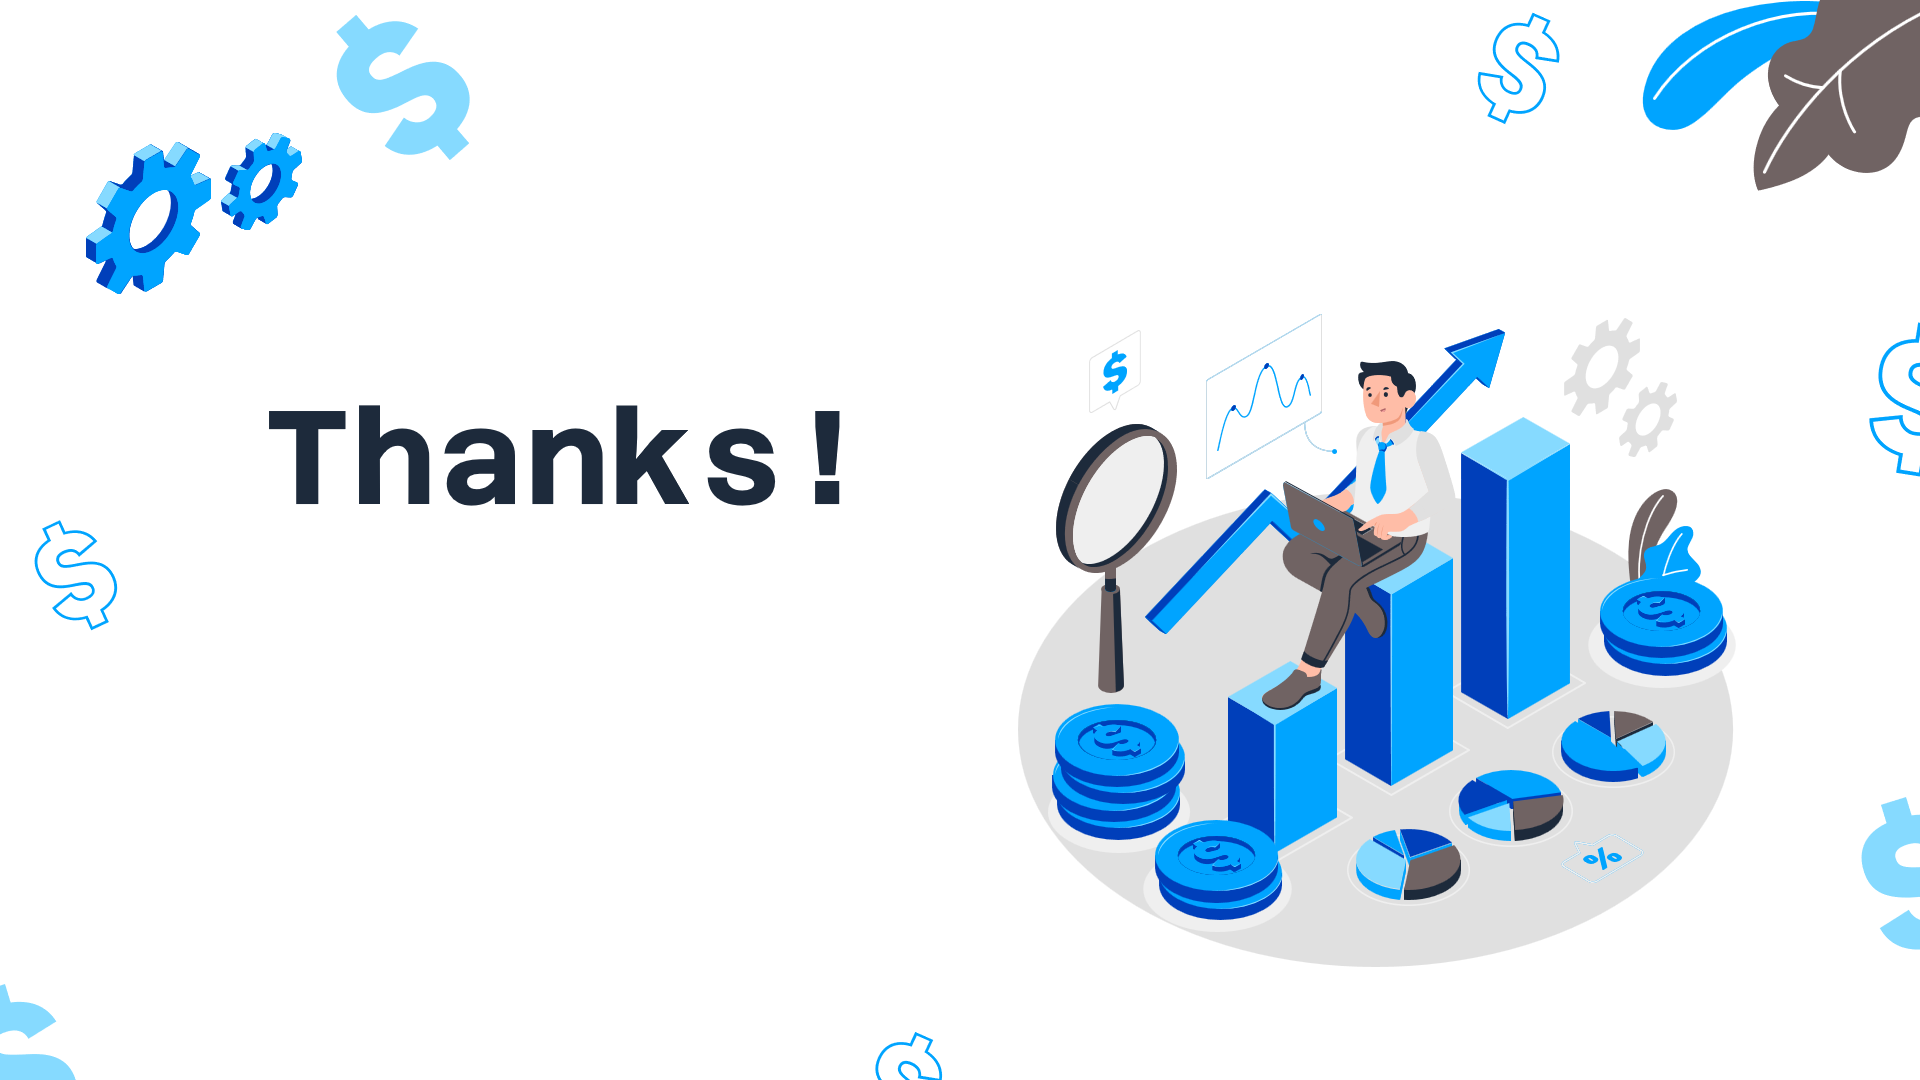